# Exploratory Data Analysis

During this phase, we examine and understand the structure, content, and characteristics of a dataset. 
We will identify patterns, anomalies, relationships, and other key aspects that may influence subsequent analyses or decision-making.

In this notebook, we will conduct an exhaustive EDA on a specific dataset. The main objectives include:

1. Understanding the Dataset:
- Load and visualize the dataset to familiarize ourselves with its general characteristics.
- Review the rows to understand its structure.

2. Missing Data:
- Identify and quantify missing data in the dataset.

3. Data Types:
- Review the data types of each column.
- Identify potential inconsistencies in data types.

4. Data Distribution:
- Analyze the distribution of data in each column.
- Use visualizations to understand the shape and spread of the data.

5. Correlations and Patterns:
- Calculate and visualize correlations between numerical variables.
- Identify potential patterns or relationships between variables.

6. Visualizations:
- Create some charts and diagrams to visualize different aspects of the dataset.

7. Evaluating Data Quality:
- Assess the overall quality of the dataset, identifying possible errors in the data.
- Propose solutions to improve the dataset's quality if necessary.

It's important to have the environment variables with your database credentials _(from the .env file)_ and the requirements _(installed via pip install -r requirements.txt)_.

---

First, we will load the environment variables from the .env file, which contains important configurations such as paths and credentials. Then, we will obtain the working directory from these variables and add it to the system path to ensure that the project's modules can be imported correctly.

In [1]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv('WORK_DIR')

sys.path.append(work_dir)

print('Workdir: ', work_dir)

Workdir:  /Users/carol/Documents/workshop01


Now, we import the necessary modules and classes for the rest of the notebook.

In [79]:
from src.db_connection import build_engine
from src.model import Candidates
from sqlalchemy.orm import sessionmaker, declarative_base, aliased
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The build_engine function is called to configure and create a connection to the PostgreSQL database.

In [3]:
engine = build_engine()

Successfully connected to the database workshop1!


A SQLAlchemy session is created using the database engine established in the previous step. Why? This session is necessary for performing read and write operations on the database.

In [4]:
Session = sessionmaker(bind=engine)
session = Session()

First, we use declarative_base() to create a base class that SQLAlchemy will use to manage the database tables and classes. This base class serves as a starting point for defining the tables and their mappings. We use aliased() to create an alias of the Candidates table. 

In [5]:
base = declarative_base()
table = aliased(Candidates)

A SQL query is performed on the Candidates table and the result is converted to a pandas DataFrame.

In [6]:
query = session.query(table).statement
df = pd.read_sql(query, engine)

## First Look at the Dataset

First, it should be noted that the data has been generated randomly, using a library. Therefore, some things in the EDA will be affected by this.

The Candidates dataset has 50,000 rows and 11 columns.

In [7]:
df.shape

(50000, 11)

Initially we have 11 columns, which are:

- **ID**: A unique identifier for each candidate.
- **First_Name**: The candidate's first name.
- **Last_Name**: The candidate's last name.
- **Email**: The email address of the candidate.
- **Country**: The country where the candidate is located.
- **Application_Date**: The date when the candidate submitted their application.
- **YOE (Years of Experience)**: The number of years of professional experience the candidate has.
- **Seniority**: The candidate's level of seniority (e.g., Junior, Mid, Senior).
- **Technology**: The primary technology or programming language the candidate specializes in.
- **Code_Challenge_Score**: The score the candidate received on a coding challenge.
- **Technical_Interview_Score**: The score the candidate received during a technical interview.

In [8]:
df.columns

Index(['ID', 'First_Name', 'Last_Name', 'Email', 'Application_Date', 'Country',
       'YOE', 'Seniority', 'Technology', 'Code_Challenge_Score',
       'Technical_Interview_Score'],
      dtype='object')

We will add one more column, called **_Hired_**, which determines if the candidate is hired (1) if they scored 7 or more in both the Technical Interview and the Coding Challenge. Otherwise, the candidate is not hired (0).

In [7]:
df['Hired'] = ((df['Code_Challenge_Score'] >=7) & (df['Technical_Interview_Score'] >=7)).astype(int)

This is how our dataset looks like:

In [12]:
df.head()

,ID,First_Name,Last_Name,Email,Application_Date,Country,YOE,Seniority,Technology,Code_Challenge_Score,Technical_Interview_Score,Hired
0,1,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,0
1,2,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,0
2,3,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,1
3,4,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,0
4,5,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,1


In [76]:
df[df['Country'].str.startswith('Coo')]

,First_Name,Last_Name,Email,Application_Date,Country,YOE,Seniority,Technology,Code_Challenge_Score,Technical_Interview_Score,Hired
90,Serenity,Zieme,mateo.zemlak@yahoo.com,2020-07-15,Cook Islands,15,Trainee,Security Compliance,6,3,0
201,Kip,Stoltenberg,lucius_pollich8@gmail.com,2019-08-18,Cook Islands,11,Mid-Level,Database Administration,9,4,0
384,Elijah,Wehner,kasandra_mclaughlin30@yahoo.com,2018-07-22,Cook Islands,2,Trainee,Development - FullStack,0,2,0
385,Kailee,Konopelski,sandra83@gmail.com,2021-11-24,Cook Islands,17,Senior,Sales,6,8,0
811,Norene,Beatty,lenny.trantow57@hotmail.com,2019-02-09,Cook Islands,0,Architect,System Administration,6,7,0
...,...,...,...,...,...,...,...,...,...,...,...
49499,Ally,Crona,felipa_kassulke@gmail.com,2019-11-13,Cook Islands,14,Intern,QA Automation,10,7,1
49538,Marisa,Mitchell,thora.trantow@yahoo.com,2021-02-02,Cook Islands,10,Junior,Security Compliance,2,6,0
49553,Chauncey,Ebert,danika35@yahoo.com,2020-07-12,Cook Islands,30,Mid-Level,Development - FullStack,4,6,0
49695,Vena,Kessler,antonia42@yahoo.com,2019-10-16,Cook Islands,29,Junior,Technical Writing,8,6,0


There are no duplicate rows

In [13]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape[0])

number of duplicate rows:  0


## Data missing

There are no data missing

In [14]:
missing_data = df.isna().sum()
missing_data

ID                           0
First_Name                   0
Last_Name                    0
Email                        0
Application_Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code_Challenge_Score         0
Technical_Interview_Score    0
Hired                        0
dtype: int64

## Data type

We have 7 categorical columns and 5 numerical columns.

In [15]:
# categorical veriables
categorical_variables=[i for i in df.columns if df[i].dtypes=='O']
print(f'\nDataset having {len(categorical_variables)} categorical variables')
print('--'*39)
print(categorical_variables)


# numerical varibles
numerical_variables=[i for i in df.columns if df[i].dtypes!='O']
print(f'\nDataset having {len(numerical_variables)} numerical variables.')
print('--'*39)
print(numerical_variables)


Dataset having 7 categorical variables
------------------------------------------------------------------------------
['First_Name', 'Last_Name', 'Email', 'Application_Date', 'Country', 'Seniority', 'Technology']

Dataset having 5 numerical variables.
------------------------------------------------------------------------------
['ID', 'YOE', 'Code_Challenge_Score', 'Technical_Interview_Score', 'Hired']


## Data Distribution

I've decided to remove the ID for now for some of the charts/tables; we'll regenerate it later.

In [10]:
df = df.drop(columns=['ID'])


We can see that:

- The distributions of YOE, Code Challenge Score, and Technical Interview Score are quite symmetric, with the mean being equal to or very close to the median.
- Hired is right-skewed (the median is lower than the mean), indicating that most candidates were not hired.
- The average years of experience for candidates is 15.
- The average score in the coding challenge and the technical interview is 5.
- The minimum years of experience is 0 and the maximum is 30.
- The minimum score in both the coding challenge and the technical interview is 0, and the maximum is 10.
- Hired, for obvious reasons, ranges from 0 to 1.
- The standard deviation for YOE is 8.83, indicating a high variability. This suggests that while the average experience is 15 years, there is a wide range of experience levels.
- The standard deviation for both Code Challenge Score and Technical Interview Score is 3.17. This means there is  considerable spread in how candidates performed in these assessments, despite the average score being 5.


There also don't seem to be any **outliers**.

In [11]:
statisticians = df.describe().T
statisticians['median'] = df.select_dtypes("number").median()
statisticians = statisticians.iloc[:,[0,1,8,2,3,4,5,6,7]]
np.round(statisticians,2)

,count,mean,median,std,min,25%,50%,75%,max
YOE,50000.0,15.29,15.0,8.83,0.0,8.0,15.0,23.0,30.0
Code_Challenge_Score,50000.0,5.00,5.0,3.17,0.0,2.0,5.0,8.0,10.0
Technical_Interview_Score,50000.0,5.00,5.0,3.17,0.0,2.0,5.0,8.0,10.0
Hired,50000.0,0.13,0.0,0.34,0.0,0.0,0.0,0.0,1.0


Here, you can visually see what was mentioned earlier. 

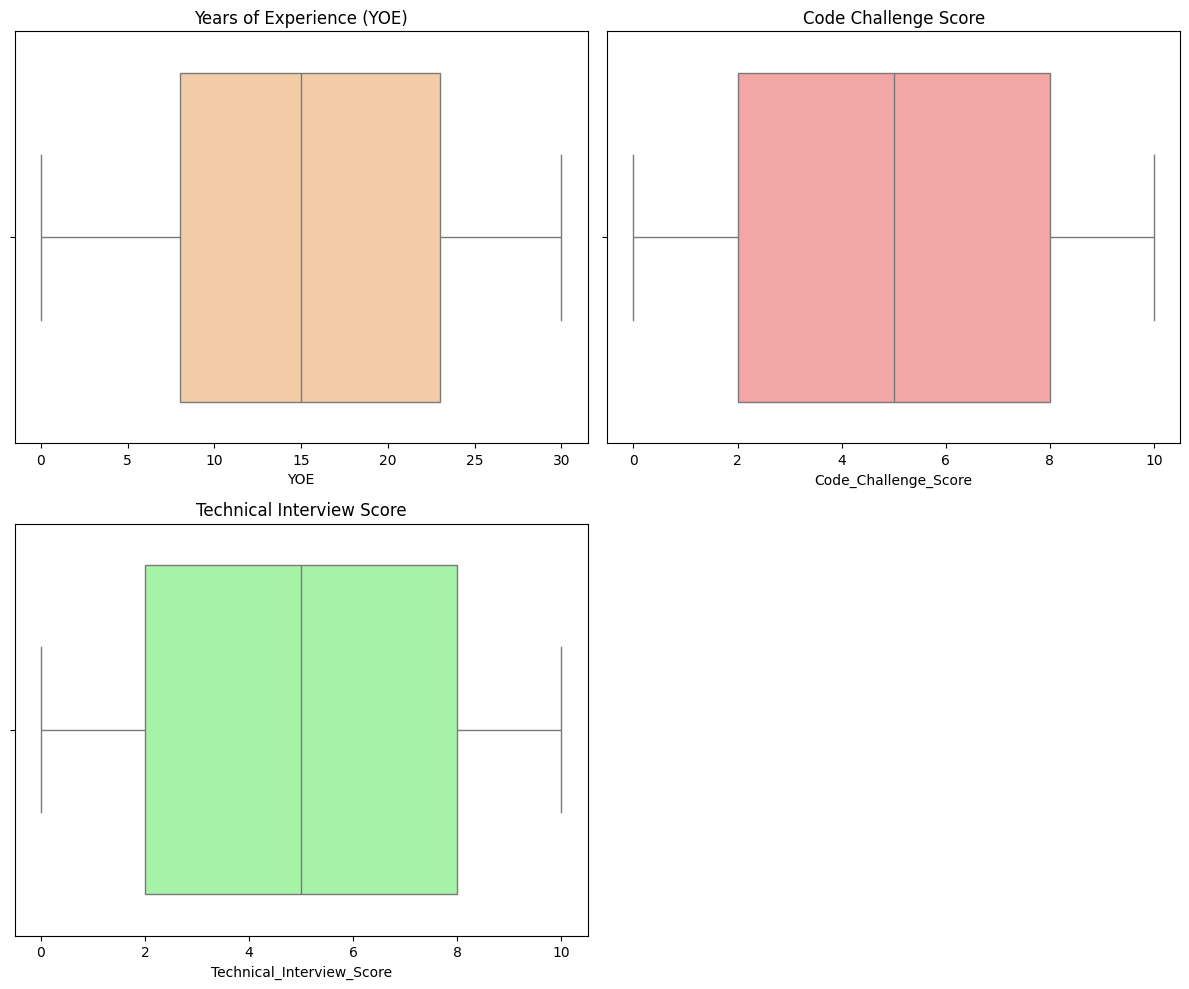

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))


sns.boxplot(ax=axes[0, 0], x=df["YOE"], color='#FFCC99')
axes[0, 0].set_title('Years of Experience (YOE)')

sns.boxplot(ax=axes[0, 1], x=df["Code_Challenge_Score"], color='#FF9999')
axes[0, 1].set_title('Code Challenge Score')

sns.boxplot(ax=axes[1, 0], x=df["Technical_Interview_Score"], color='#99FF99')
axes[1, 0].set_title('Technical Interview Score')

fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

The graphs for Seniority, Country (showing only the top 20 countries), and Technology are displayed. We can highlight that in Technology, there is a significant amount of data related to Game Development and Social Media Community Management.

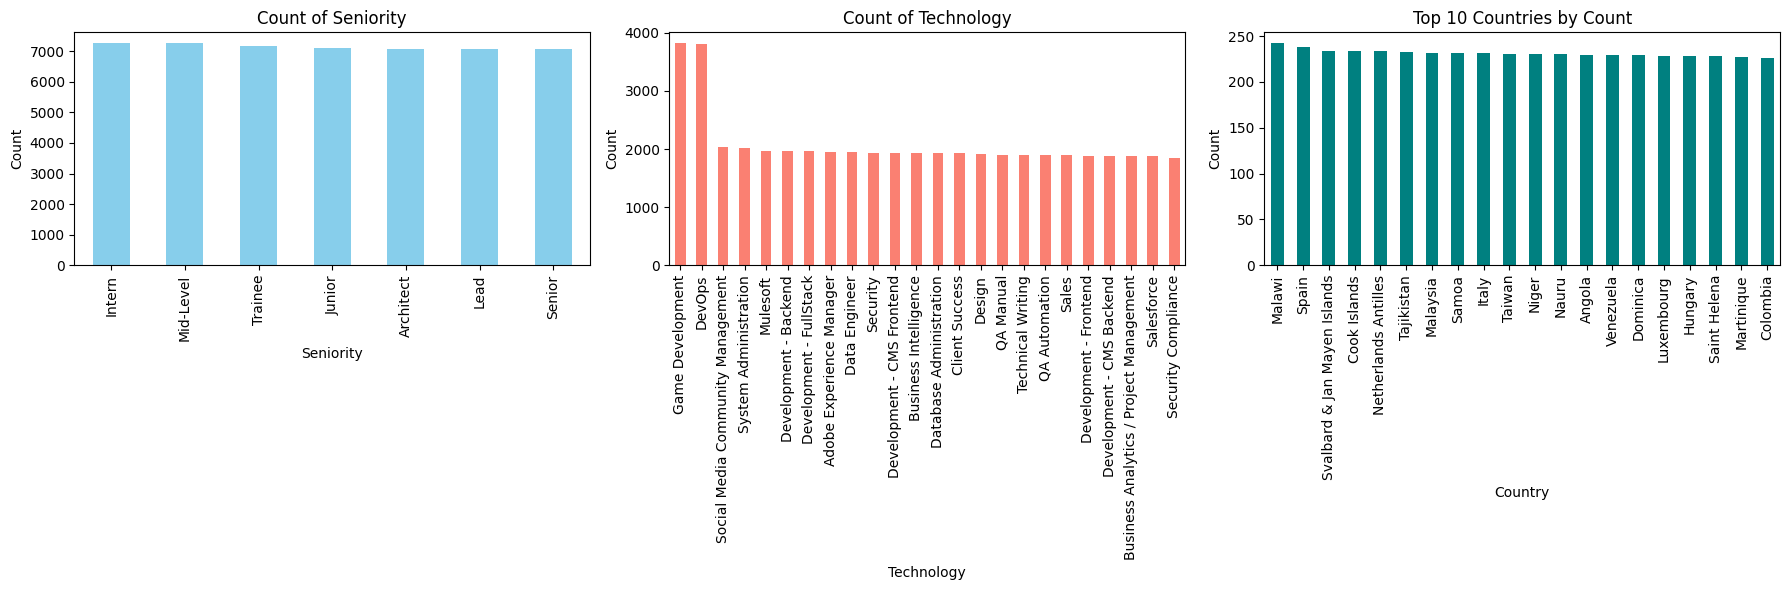

In [124]:
seniority_counts = df['Seniority'].value_counts()
technology_counts = df['Technology'].value_counts()
country_counts = df['Country'].value_counts().head(20)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

seniority_counts.sort_values(ascending=False).plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Count of Seniority')
axs[0].set_xlabel('Seniority')
axs[0].set_ylabel('Count')

technology_counts.sort_values(ascending=False).plot(kind='bar', ax=axs[1], color='salmon')
axs[1].set_title('Count of Technology')
axs[1].set_xlabel('Technology')
axs[1].set_ylabel('Count')

country_counts.sort_values(ascending=False).plot(kind='bar', ax=axs[2], color='teal')
axs[2].set_title('Top 10 Countries by Count')
axs[2].set_xlabel('Country')
axs[2].set_ylabel('Count')


plt.tight_layout()
plt.show()

## Data Correlation

In this correlation matrix, we see:

- YOE has a very low or nonexistent correlation with the other variables.
- Code_Challenge_Score and Technical_Interview_Score have a moderate correlation with the Hired variable (0.44 and 0.43, respectively), indicating that as these scores increase, the likelihood of being hired also increases (which makes sense since we created the Hired column based on these scores).
- The low correlation between Code_Challenge_Score and Technical_Interview_Score (-0.00) suggests that performance in one does not necessarily predict performance in the other.

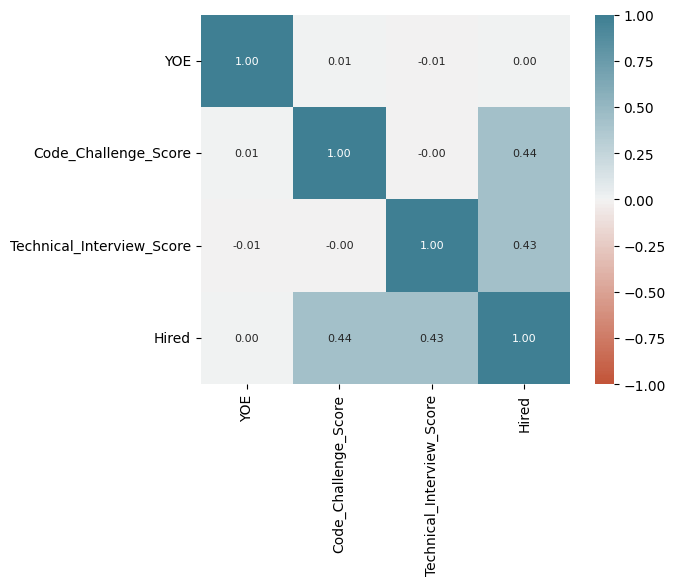

In [20]:
correlation= df.select_dtypes(include=[float, int]).corr()

ax = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 8}
)

# Data Patterns

Out of the candidates who applied, only 13.4% were hired.

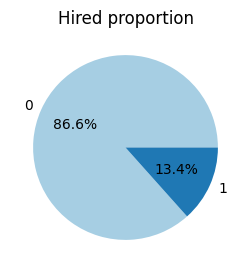

In [25]:
hired_count = df['Hired'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(hired_count, labels=hired_count.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Hired proportion')
plt.show()

In the charts, we can see that:

- The country with the highest number of hires was the Northern Mariana Islands.
- Most of the hired candidates had 0 years of experience.
- The most common seniority level among the hired candidates was Junior.
- The technology with the highest number of hired candidates was Development - CMS Backend.
- The most frequent Code Challenge score among the hired candidates was 9.
- The most frequent Technical Interview score among the hired candidates was 7.

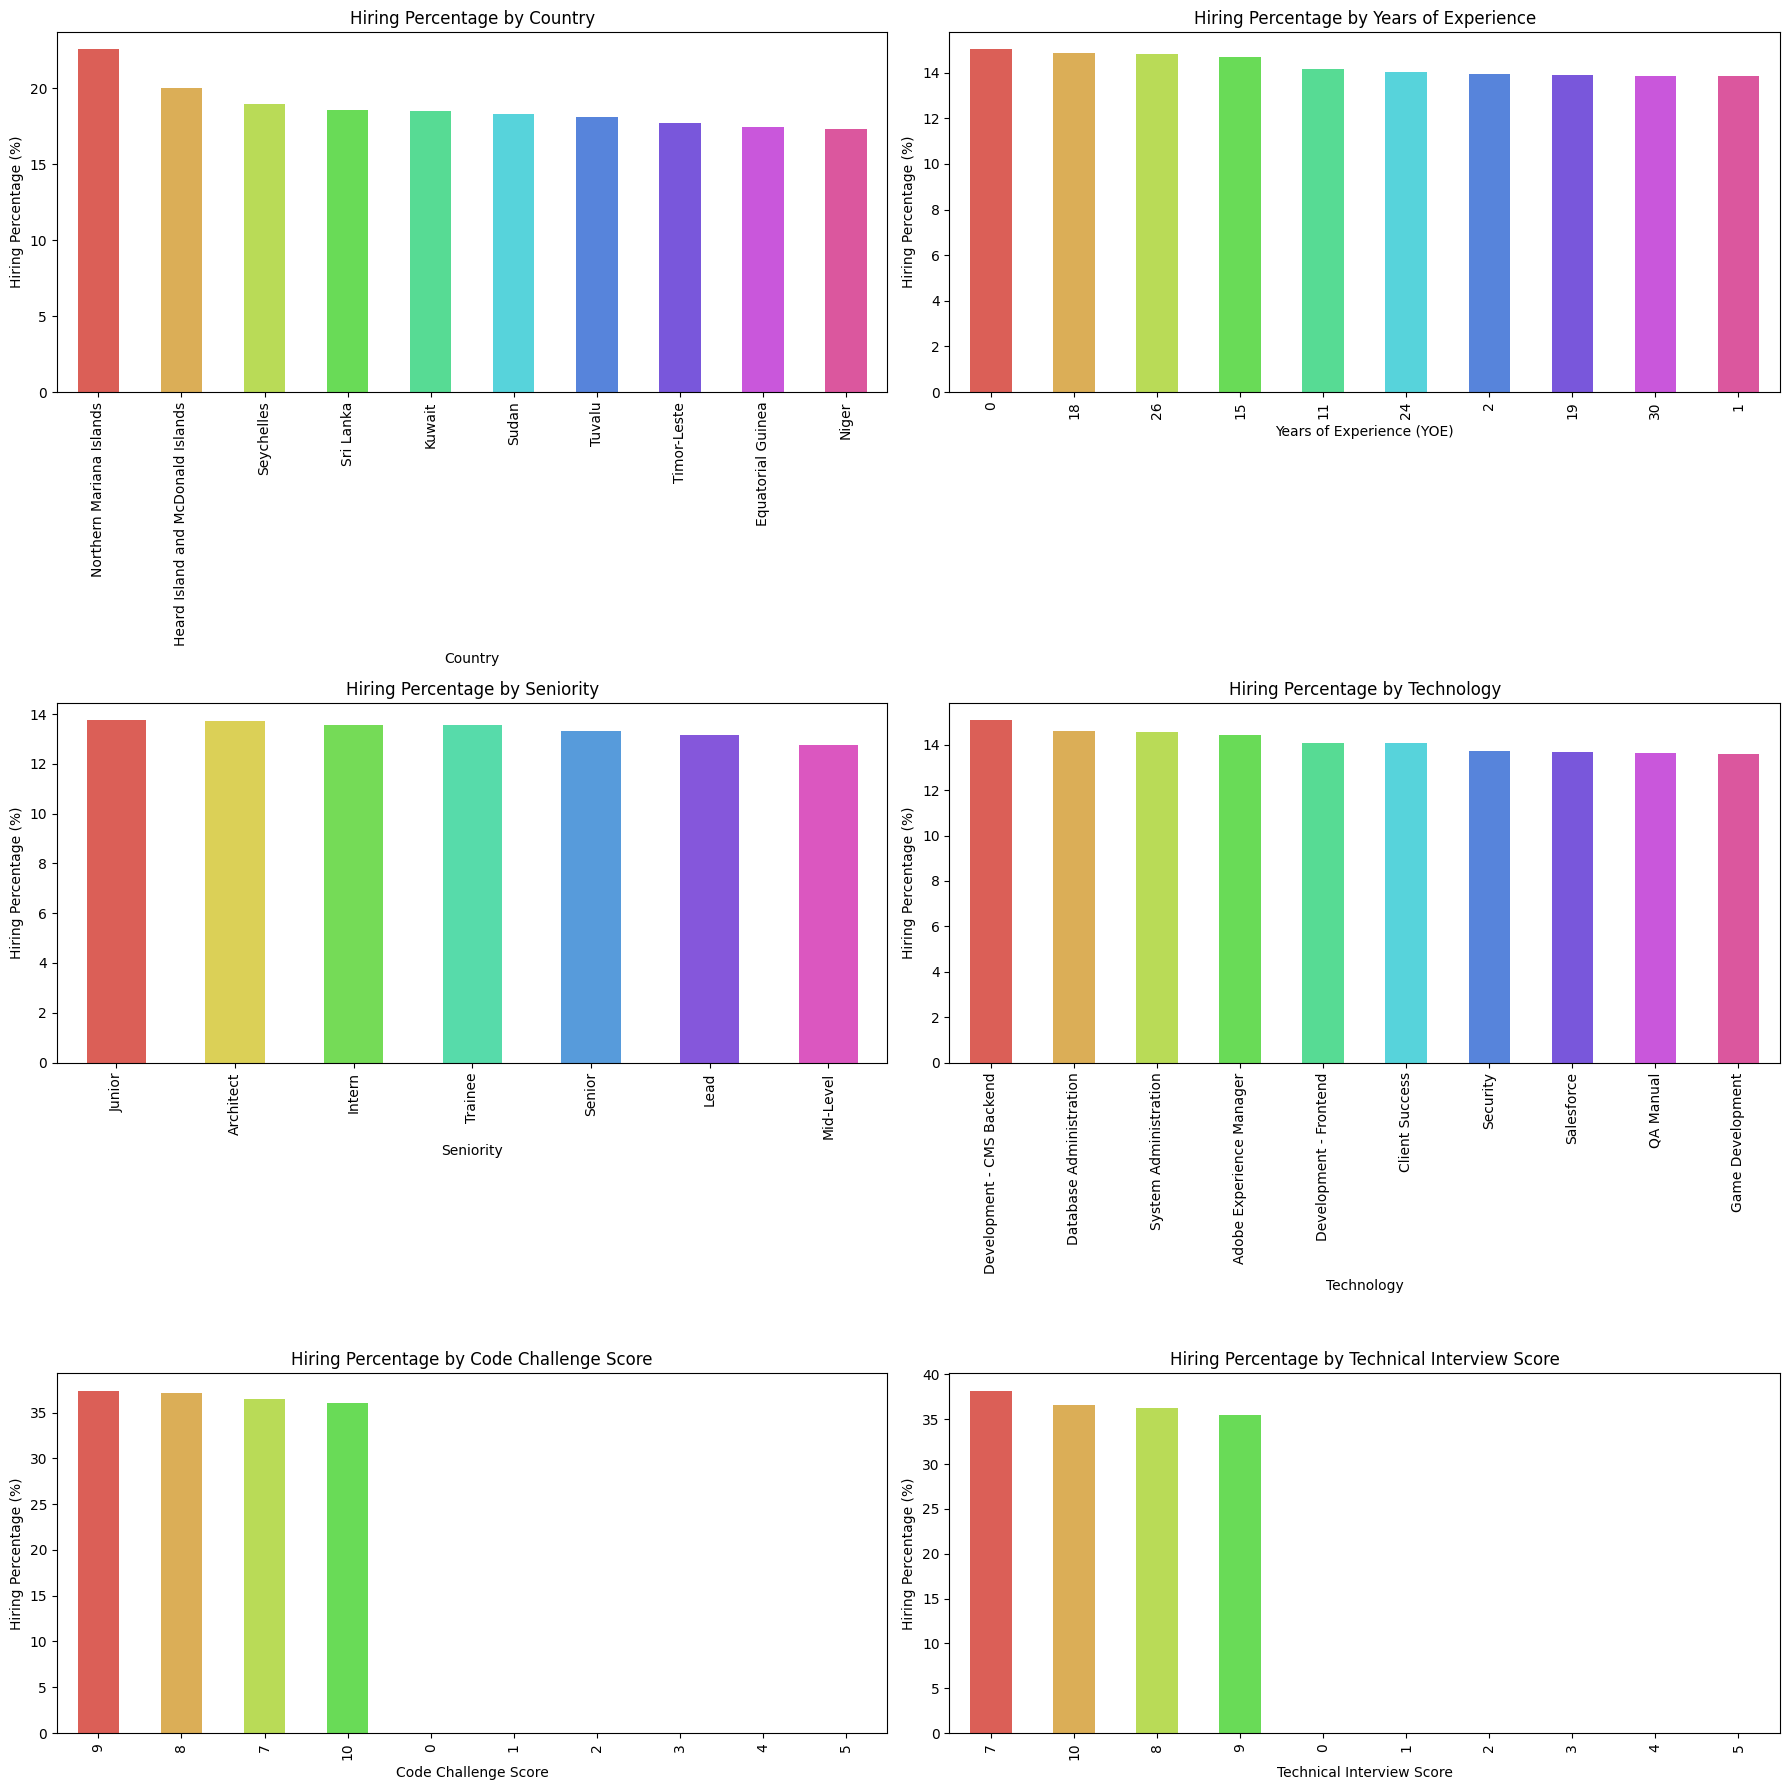

In [60]:
fig, axs = plt.subplots(3, 2, figsize=(18, 18))


temp = df.groupby('Country').Hired.mean().sort_values(ascending=False) * 100
temp = temp[0:10]
palette = sns.color_palette("hls", len(temp))
temp.plot.bar(color=palette, ax=axs[0, 0])
axs[0, 0].set_title('Hiring Percentage by Country')
axs[0, 0].set_xlabel('Country')
axs[0, 0].set_ylabel('Hiring Percentage (%)')


temp = df.groupby('YOE').Hired.mean().sort_values(ascending=False) * 100
temp = temp[0:10]
palette = sns.color_palette("hls", len(temp))
temp.plot.bar(color=palette, ax=axs[0, 1])
axs[0, 1].set_title('Hiring Percentage by Years of Experience')
axs[0, 1].set_xlabel('Years of Experience (YOE)')
axs[0, 1].set_ylabel('Hiring Percentage (%)')


temp = df.groupby('Seniority').Hired.mean().sort_values(ascending=False) * 100
temp = temp[0:10]
palette = sns.color_palette("hls", len(temp))
temp.plot.bar(color=palette, ax=axs[1, 0])
axs[1, 0].set_title('Hiring Percentage by Seniority')
axs[1, 0].set_xlabel('Seniority')
axs[1, 0].set_ylabel('Hiring Percentage (%)')


temp = df.groupby('Technology').Hired.mean().sort_values(ascending=False) * 100
temp = temp[0:10]
palette = sns.color_palette("hls", len(temp))
temp.plot.bar(color=palette, ax=axs[1, 1])
axs[1, 1].set_title('Hiring Percentage by Technology')
axs[1, 1].set_xlabel('Technology')
axs[1, 1].set_ylabel('Hiring Percentage (%)')

temp = df.groupby('Code_Challenge_Score').Hired.mean().sort_values(ascending=False) * 100
temp = temp[0:10]
palette = sns.color_palette("hls", len(temp))
temp.plot.bar(color=palette, ax=axs[2, 0])
axs[2, 0].set_title('Hiring Percentage by Code Challenge Score')
axs[2, 0].set_xlabel('Code Challenge Score')
axs[2, 0].set_ylabel('Hiring Percentage (%)')

temp = df.groupby('Technical_Interview_Score').Hired.mean().sort_values(ascending=False) * 100
temp = temp[0:10]
palette = sns.color_palette("hls", len(temp))
temp.plot.bar(color=palette, ax=axs[2, 1])
axs[2, 1].set_title('Hiring Percentage by Technical Interview Score')
axs[2, 1].set_xlabel('Technical Interview Score')
axs[2, 1].set_ylabel('Hiring Percentage (%)')

plt.tight_layout()
plt.show()

## Data Visualization

In this graph, which shows the number of candidates by month and year, we can see:

- From 2018 to 2021, there were between approximately 800-1000 candidates applying.
- There are no records for the last 5 months of 2022.
- There was a significant decrease in the number of candidates in July 2022 (112 candidates), so it is likely that many days during that month are not recorded.
- Besides July 2022, the month with the fewest candidates recorded was February 2029.
- The month with the most candidates recorded was December 2020 (992 candidates).

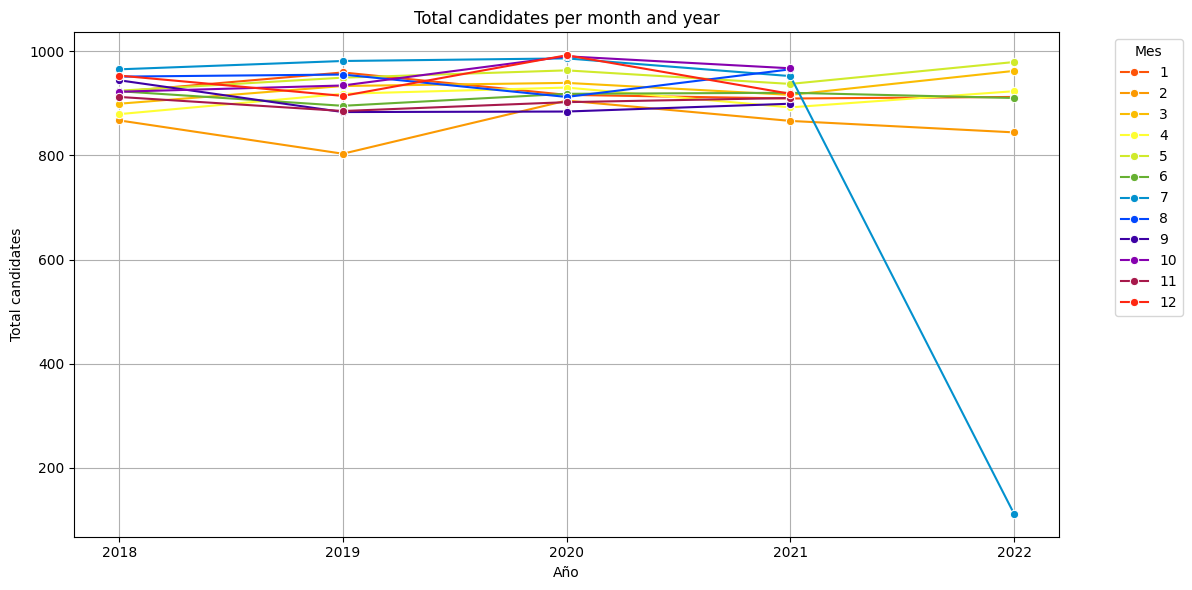

In [50]:
df_date = df.copy()
df_date['Application_Date'] = pd.to_datetime(df_date['Application_Date'])
df_date['year'] = df_date['Application_Date'].dt.year
df_date['month'] = df_date['Application_Date'].dt.month

df_total_candidates = df_date.groupby(['year', 'month']).size().reset_index(name='total_candidates')
df_total_candidates['month'] = df_total_candidates['month'].astype('category')

palette = ['#fd5308', '#fb9902', '#fabc02', '#fefe33', '#d0ea2b', '#66b032', '#0391ce', '#0247fe', '#3d01a4', '#8601af', '#a7194b', '#fe2712']
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_total_candidates, x='year', y='total_candidates', hue='month', marker='o', palette= palette)

plt.title('Total candidates per month and year')
plt.xlabel('Año')
plt.ylabel('Total candidates')
plt.legend(title='Mes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()

plt.show()

This graph shows the hired and not hired candidates over the years. In reality, there hasn’t been much difference. The year 2018 had the fewest hires, while 2020 had the most hires.

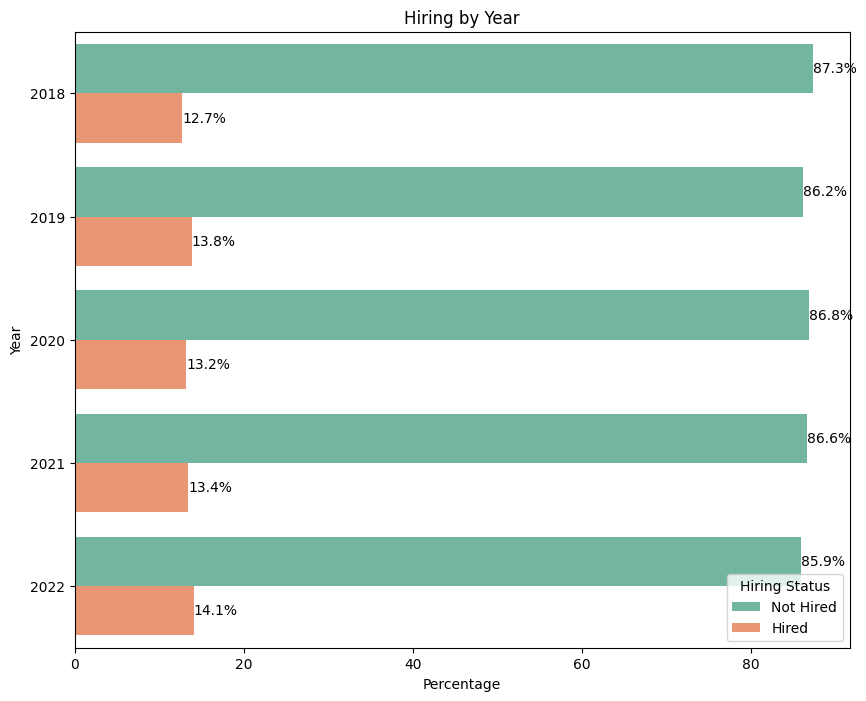

In [62]:
df_date['count'] = 1

df_summary = df_date.groupby(['year', 'Hired']).agg({'count': 'sum'}).reset_index()
df_summary['percentage'] = (df_summary['count'] / df_summary.groupby('year')['count'].transform('sum')) * 100
df_summary['Hired'] = df_summary['Hired'].map({1: 'Hired', 0: 'Not Hired'})

plt.figure(figsize=(10, 8))

ax = sns.barplot(data=df_summary, x='percentage', y='year', hue='Hired', orient='h', dodge=True, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    if height > 0.1:
        width = p.get_width()
        x = width
        y = p.get_y() + p.get_height() / 2
        ax.text(x, y, f'{width:.1f}%', va='center', ha='left', fontsize=10, color='black')
        
plt.xlabel('Percentage')
plt.ylabel('Year')
plt.title('Hiring by Year')
plt.legend(title='Hiring Status')
plt.show()

The box plot compares the years of experience among different seniority levels of the candidates. At first glance, it is observed that the median years of experience are similar across all levels, ranging from about 8 to 23 years. This will be discussed further in the data quality section.

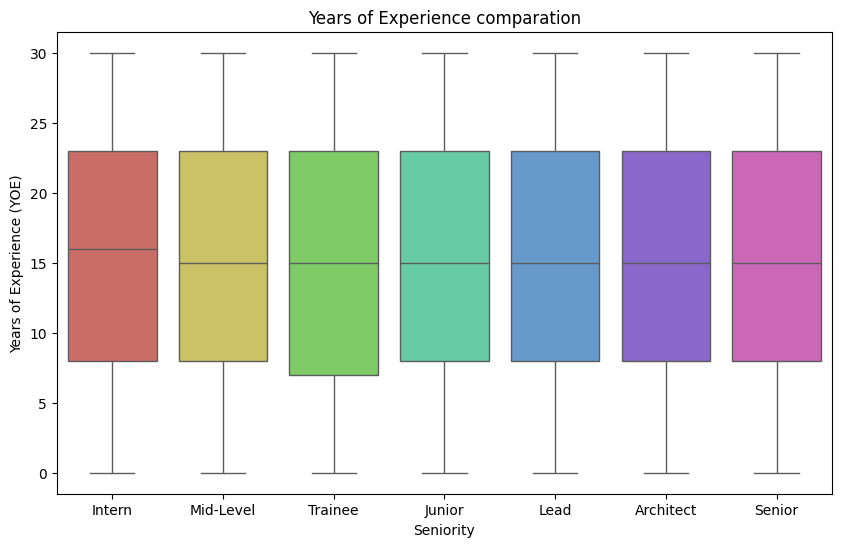

In [63]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Seniority', y='YOE', data=df, hue='Seniority', palette='hls', dodge=False, legend=False)
plt.title('Years of Experience comparation')
plt.xlabel('Seniority')
plt.ylabel('Years of Experience (YOE)')
plt.show()

## Data Quality

We can see that there are repeated email addresses, but if we check, the candidate's name, country, years of experience, among other details, do not match. This is because the data in the dataset is random, and therefore, it lacks coherence.

In [49]:
print(df.value_counts('Email'))

df[df['Email']== 'marianne31@yahoo.com']

Email
marianne31@yahoo.com                3
fern70@gmail.com                    3
hildegard_prohaska@yahoo.com        2
macey77@yahoo.com                   2
octavia58@gmail.com                 2
                                   ..
esperanza83@gmail.com               1
esperanza85@gmail.com               1
esperanza9@hotmail.com              1
esperanza_balistreri13@gmail.com    1
zula_weissnat@hotmail.com           1
Name: count, Length: 49833, dtype: int64


,First_Name,Last_Name,Email,Application_Date,Country,YOE,Seniority,Technology,Code_Challenge_Score,Technical_Interview_Score,Hired
3927,Arielle,Harris,marianne31@yahoo.com,2021-05-04,Morocco,29,Lead,Security Compliance,2,1,0
19463,Tristian,Quitzon,marianne31@yahoo.com,2021-04-13,Niger,13,Lead,Security Compliance,1,7,0
30932,Tod,Kuhlman,marianne31@yahoo.com,2019-11-17,Gibraltar,11,Architect,Social Media Community Management,2,2,0


There are also inconsistencies regarding years of experience and seniority, with cases where a person with no experience is labeled as a senior.

In [67]:
df_senior_zero_experience = df[(df['YOE'] == 0) & (df['Seniority'] == 'Senior')]
print('Total registros:', df_senior_zero_experience.shape[0])
df_senior_zero_experience.head(3)

Total registros: 100


,First_Name,Last_Name,Email,Application_Date,Country,YOE,Seniority,Technology,Code_Challenge_Score,Technical_Interview_Score,Hired
746,Mike,Miller,angeline.klein@yahoo.com,2019-09-28,Nigeria,0,Senior,DevOps,4,5,0
1039,Adrian,West,kade1@hotmail.com,2020-05-04,Congo,0,Senior,Salesforce,5,5,0
1186,Maureen,Hoeger,jannie54@yahoo.com,2018-02-22,Canada,0,Senior,Salesforce,0,9,0


There are also a large number of technologies that could be grouped into a single category.

In [74]:
unique_technology = df['Technology'].unique()
print("Total Technologies: ", len(unique_technology))
unique_technology

Total Technologies:  24


array(['Data Engineer', 'Client Success', 'QA Manual',
       'Social Media Community Management', 'Adobe Experience Manager',
       'Sales', 'Mulesoft', 'DevOps', 'Development - CMS Backend',
       'Salesforce', 'System Administration', 'Security',
       'Game Development', 'Development - CMS Frontend',
       'Security Compliance', 'Development - Backend', 'Design',
       'Business Analytics / Project Management',
       'Development - Frontend', 'Development - FullStack',
       'Business Intelligence', 'Database Administration',
       'QA Automation', 'Technical Writing'], dtype=object)